# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or noc someaone has heart disease based on their medical attributes

Were going to take the following approach:
1. Problem definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleaveland data from the UCI Machine Learning Repository.

Also a version available on Kaggle

## 3. Evaluation

> If we can reach 95 percent accuracy at predicitng whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

**Creat data dictionary**

* age in years
* sex
* cp chest pain type...

This is where youll get different information about each of the features in your data

## Preparing the tools

We are going to use pandas, matplotlib and NumPy for data analysisi and manipulation

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

My name is Tim and I am 25 years old!
None


# Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more on the data and become a subject matter expert on the dataset your working with

Checklist:
    1. What questions are we trying to solve
    2. What kind of data do we have and how do we treat different types?
    3. Whats missing from the data and how do you deal with it?
    4. Where are the outliers and why should you care about them?
    5. How can you add, change or move features to get more out of your data?

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#lets find out of how many of those are there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

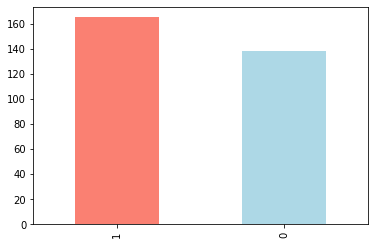

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
# are there missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency to Sex

In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target column with sex column

pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


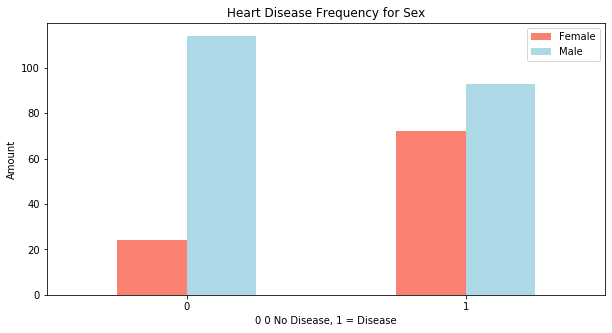

In [12]:
# create a plot  of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,5),
                                        color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 0 No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [13]:
df["thalach"].value_counts().head()

162    11
160     9
163     9
173     8
152     8
Name: thalach, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

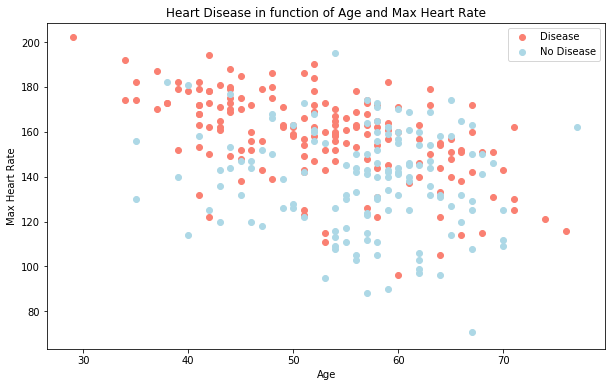

In [14]:
# Creating another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df["age"][df["target"]==1], 
            df["thalach"][df["target"]==1],
           color="salmon")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c= "lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

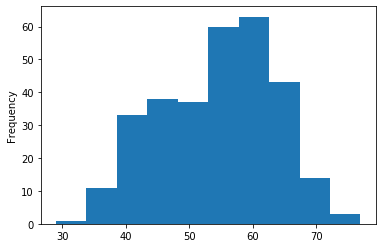

In [15]:
# check the distribution of the age column with a histogram
df.age.plot(kind="hist");

# normal distribution looks like a bell curve
# we seet that most of our patients are about 60 years old

### Heart Disease Frequency per Chest Pain Type

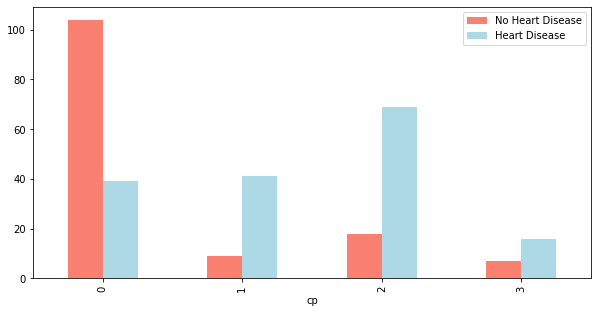

In [16]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize=(10,5), color=["salmon", "lightblue"])
plt.legend(["No Heart Disease", "Heart Disease"])

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Make a correlation matrix
import seaborn as sb

corr_matrix =df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


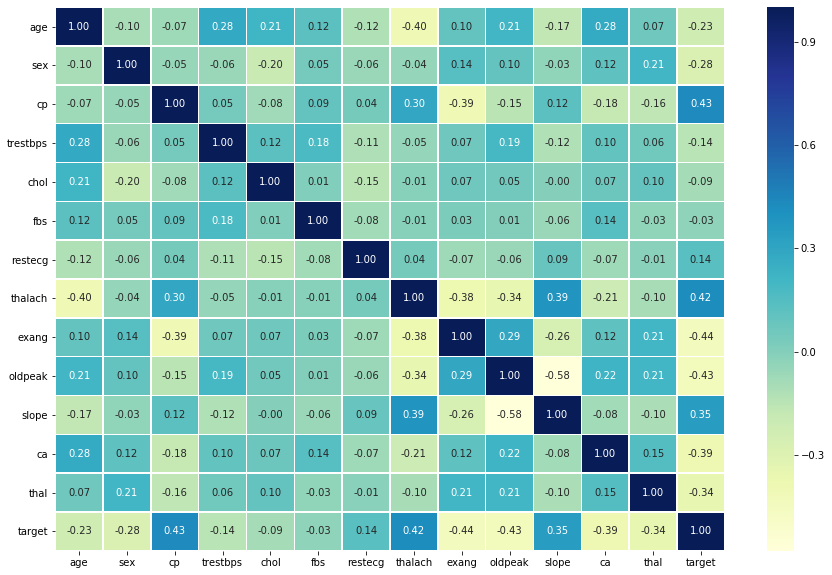

In [19]:
fig, ax, = plt.subplots(figsize=(15,10))
ax = sb.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# split data into X and y 

X = df.drop("target", axis=1)
y = df["target"]

In [22]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Its time to build a machine learning model 

well train it (find patterns) on the training set

and well test it (using patterns) on the test set

we are going to try 3 different machine learning models:

**1. Logistic Regression** 

**2. K-Nearest Neighbours Classification**

**3. Random Forest Classifier**

In [23]:
# Put models in a dictionary

models = {
    "Logistic Regression": LogisticRegression(solver="liblinear"),
    "KNearest Neighbor": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# create a function to train and evaluate the data using the models
# my solution

def fit_and_score(model_dict):
    
    np.random.seed(42)
    model_scores = {}
    
    for key, value in models.items():
        value.fit(X_train, y_train)
        model_scores[key] = value.score(X_test,y_test)
        
    return model_scores
              
model_scores = fit_and_score(models)
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNearest Neighbor': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

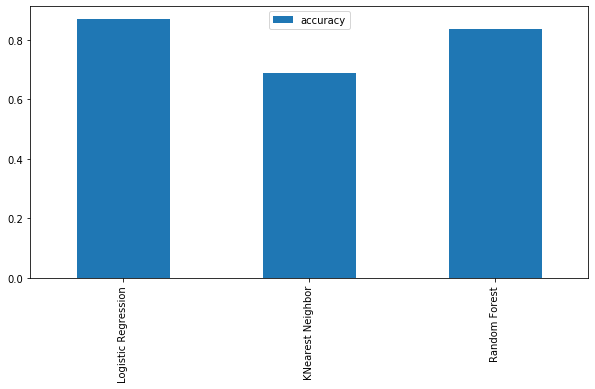

In [24]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
#model_compare.iloc[0].plot(kind="bar", figsize=(10,5));
model_compare.T.plot(kind="bar", figsize=(10,5));

Now we got a basline model ... and we know a models first predictions arents always what we should based our next steps off...What should we do?

Lets look at the following:

* Hyperparameter Tuning 
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall 
* F1 score
* Classifiction Report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter Tuning

In [25]:
# lets tune KNN

train_scores = []

test_scores = []

# Creat a list of different values for n_neighbors
neighbors = range(1,21)
knn = KNeighborsClassifier()

#loop through different n_neighbors
for x in neighbors:
    knn.set_params(n_neighbors=x)
    
    #fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))  
    
    

The Maximum KNN score on the test data: 75.41%


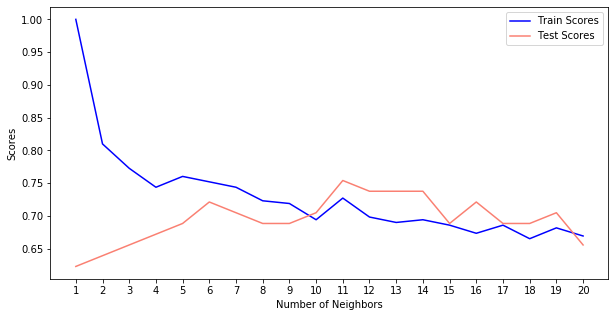

In [26]:
fig = plt.subplots(figsize=(10,5))
plt.plot(neighbors, train_scores, label="Train Scores", c="blue")
plt.plot(neighbors, test_scores, label="Test Scores", c="salmon")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.legend()

print(f"The Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

We are going to tune:
    * LogisticRegression
    * RandomforecastClassifier
    
    
..using RandomizedSearch CV

In [27]:
# Create a hyperparameter Grid for LogisticRegression

log_grid_grid = {"C": np.logspace(-4,4,20),
                 "solver": ["liblinear"]}

# Creat a hyperparameter Grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Now weve got hyperparameter grids setup for each of our models, lets tune thme using RandomizedSearchCV

In [28]:
# Tune LogisticRegression

np.random.seed(42)

# Setup Random hyperparameter search for LogisticsRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_grid_grid,
                               cv= 5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
C:\Users\DENNWEBE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [29]:
 rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we tuned LogisticRegressioin lets do the same for RandomForestClassifier

In [31]:
#Setup Random seed
np.random.seed(42)

#Setup random hyperparamter seach for RandomForestClassifier
rfc = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid, 
                        cv=5,
                        n_iter=20,
                        verbose=True)

#fit random hyperparameter search model for RandomforestClassifier()
rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   31.5s finished
C:\Users\DENNWEBE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [32]:
# find the best hyperparameters
rfc.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [33]:
rfc.score(X_test, y_test)

0.8688524590163934

1. by hand
2. RandomSearchCV
3. GridSearchCV

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, well try and improve them again using GridSearchCV..

In [34]:
# Different hypererparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegresison
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit grid hypererparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
C:\Users\DENNWEBE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
#check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
# evaluate on the test set
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [37]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNearest Neighbor': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Evaluating our tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall 
* F1-score

.. and it woud be great if cross-validation was used where possible

To make comparisons and evaluate or trained mode, first we need to make predictions

In [38]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [39]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
# import ROC curve functiton
from sklearn.metrics import roc_curve

roc = roc_curve(y_test, y_preds)
roc

(array([0.        , 0.13793103, 1.        ]),
 array([0.     , 0.90625, 1.     ]),
 array([2, 1, 0], dtype=int64))

In [41]:
# Conufusion Matrix
con =confusion_matrix(y_test,y_preds)
con_mat = pd.DataFrame(con)
con_mat

,0,1
0,25,4
1,3,29


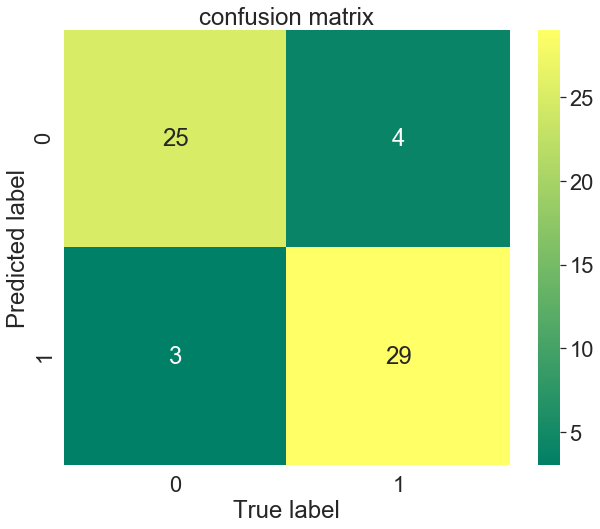

In [42]:
sb.set(font_scale=2)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sb.heatmap(con_mat, cmap="summer", annot=True)
    ax.set(xlabel="True label", ylabel="Predicted label", title="confusion matrix")
plot_conf_mat(y_test, y_preds)

#lets get a classification report as well as cross-validated precision, recall and f1-score

In [43]:
cr = classification_report(y_test, y_preds)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics usin cross-validation

Were going to calculate precision, recall, and f1-score of our model using cross-validation and to do so well be using cross_val_score()

In [44]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
# Create a new classifier with best params
clf = LogisticRegression(C = 0.20433597178569418, solver="liblinear" )

In [46]:
# cross-validated accuracy
cv_acc = cross_val_score(clf,X, y, cv=5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [47]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [48]:
# cross-validated precision
cv_prc = np.mean(cross_val_score(clf, X, y,cv=5, scoring="precision"))
cv_prc

0.8215873015873015

In [49]:
# cross-validated recall
cv_rec = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cv_rec

0.9272727272727274

In [50]:
# cross-validated f1
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
cv_f1

0.8705403543192143

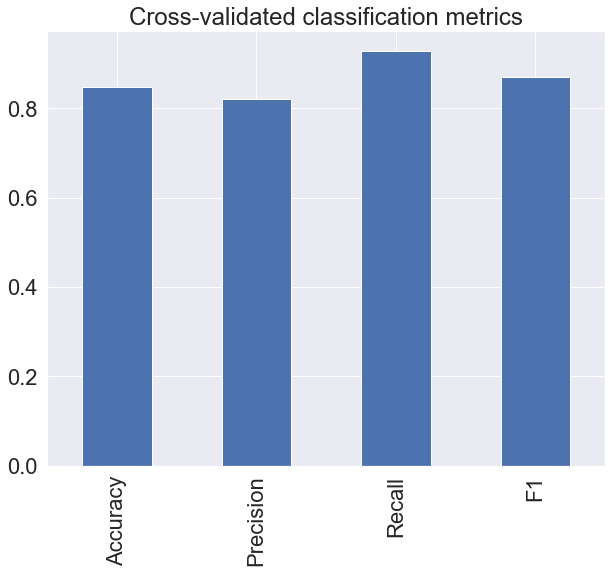

In [51]:
# Visualize our cross validated matrix 
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prc,
                          "Recall": cv_rec, 
                          "F1": cv_f1}, index=[0])

cv_metrics.T.plot.bar(legend=False, title="Cross-validated classification metrics", figsize=(10,8));

### Feature Importance 

Feature importance is another as asking, "which features contributed most to the outcomes of the model an how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for ("MODEL NAME") feature importance"

Lets find the feature importance for our LogisticRegression model ... 

In [52]:
# fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
# Check coef_ - how das every single of this independent coefficients in the training set contribute to the target
clf.coef_

array([[ 0.00316728, -0.86044622,  0.66067059, -0.01156993, -0.00166374,
         0.04386122,  0.31275815,  0.02459361, -0.60413062, -0.5686283 ,
         0.45051625, -0.63609881, -0.67663383]])

In [56]:
# Match coefs of features to columns
feature_dict=  dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775089892488,
 'sex': -0.8604462193284903,
 'cp': 0.6606705857793441,
 'trestbps': -0.01156993031867032,
 'chol': -0.0016637442407918324,
 'fbs': 0.04386122408903933,
 'restecg': 0.31275815497333875,
 'thalach': 0.024593612835517458,
 'exang': -0.6041306248075571,
 'oldpeak': -0.5686282991341255,
 'slope': 0.4505162464116119,
 'ca': -0.6360988070697587,
 'thal': -0.6766338279094292}

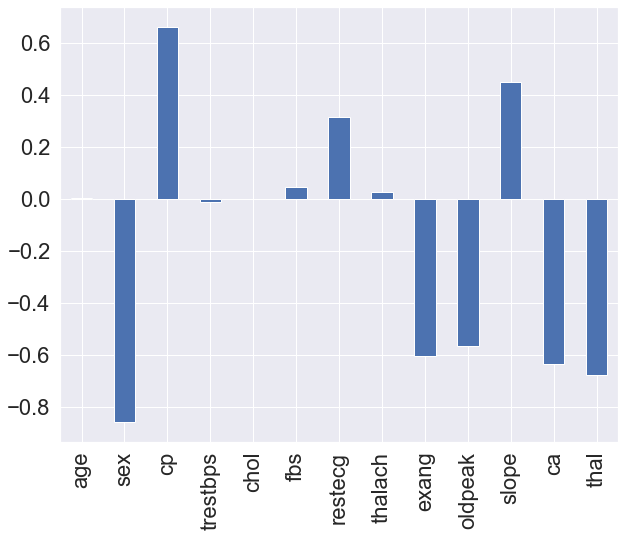

In [57]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(figsize=(10,8), legend=False);

In [58]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [59]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - th slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopings: signs of unhealthy heart

## 6. Experimentation

if you havent hit your evaluation metric yet ... ask yourself...

* could you collect more data?
* could you try a better model? Like CatBoost or XGBoost?
* could we improve the current models? (beyond what we've done so far)
* If your model is good enough ( you have hit your evaluation metric) how would you export and share this with your colleagues

